#### - Sobhan Moradian Daghigh
#### - 12/5/2021
#### - ML - EX02 - Q2

In [86]:
import numpy as np
import pandas as pd
from PIL import Image
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

#### Hiii. As u know, always the first thing before starting to code, is a mental image of it :) 

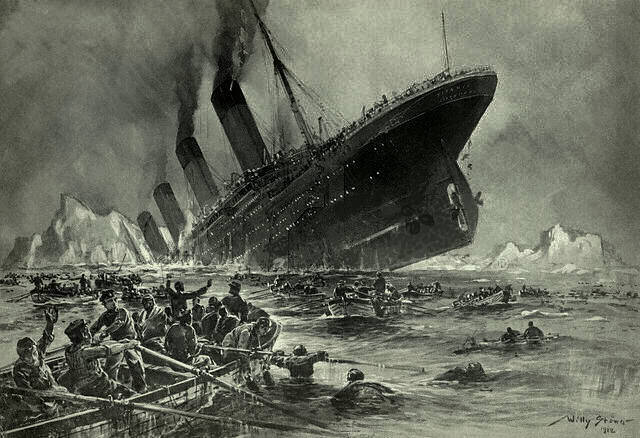

In [87]:
Image.open('./titanic.jpg')   

#### Reading datasets 

In [88]:
train = pd.DataFrame(pd.read_csv('./titanic/train.csv'))
test  = pd.DataFrame(pd.read_csv('./titanic/test.csv'))

In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Therefore, it seems that (Age, Cabin, Embarked) columns have missing values.

#### Define a function for mapping different data types to integer or making data segmentations instead of using LabelEncoder

In [92]:
def mapper(dataset1, dataset2, attr, map_dict, mode=0):
    for dataset in [dataset1, dataset2]:
        if attr == 'Cabin' and mode == 0:    # mode is for Cabin attr which have 2 different action
            dataset[attr] = dataset[attr].apply(lambda x: next((v for k, v in map_dict.items() if x[0] in k), 0))
        elif attr == 'Age':
            dataset[attr] = dataset[attr].apply(lambda x: next((v for k, v in map_dict.items() if x in k), 0))
        else:
            dataset[attr] = dataset[attr].apply(lambda x: next((v for k, v in map_dict.items() if x == k), 0))
    return [dataset1, dataset2]

#### Ok now try to handling missing values step by step

#### In order to have a good estimation of missing ages, lets group by the datas like this and then estimate the values of each group missing ages

In [93]:
group = train.groupby(by=['Sex', 'Pclass', 'Survived'])
group.first()

PassengerId  \
Sex    Pclass Survived                
female 1      0                 178   
              1                   2   
       2      0                  42   
              1                  10   
       3      0                  15   
              1                   3   
male   1      0                   7   
              1                  24   
       2      0                  21   
              1                  18   
       3      0                   1   
              1                  37   

                                                                     Name  \
Sex    Pclass Survived                                                      
female 1      0                                Isham, Miss. Ann Elizabeth   
              1         Cumings, Mrs. John Bradley (Florence Briggs Th...   
       2      0         Turpin, Mrs. William John Robert (Dorothy Ann ...   
              1                       Nasser, Mrs. Nicholas (Adele Achem)   
       3      0                      Vestrom, Miss. Hulda Amanda Adolfina   
              1                                    Heikkinen, Miss. Laina   
male   1      0                                   McCarthy, Mr. Timothy J   
              1                              Sloper, Mr. William Thompson   
       2      0                                      Fynney, Mr. Joseph J   
              1                              Williams, Mr. Charles Eugene   
       3      0                                   Braund, Mr. Owen Harris   
              1                                          Mamee, Mr. Hanna   

                         Age  SibSp  Parch            Ticket     Fare  Cabin  \
Sex    Pclass Survived                                                         
female 1      0         50.0      0      0          PC 17595  28.7125    C49   
              1         38.0      1      0          PC 17599  71.2833    C85   
       2      0         27.0      1      0             11668  21.0000    E77   
              1         14.0      1      0            237736  30.0708    F33   
       3      0         14.0      0      0            350406   7.8542     G6   
              1         26.0      0      0  STON/O2. 3101282   7.9250     G6   
male   1      0         54.0      0      0             17463  51.8625    E46   
              1         28.0      0      0            113788  35.5000     A6   
       2      0         35.0      0      0            239865  26.0000     F2   
              1         34.0      0      0            244373  13.0000    D56   
       3      0         22.0      1      0         A/5 21171   7.2500  F G73   
              1         32.0      0      0              2677   7.2292    E10   

                       Embarked  
Sex    Pclass Survived           
female 1      0               C  
              1               C  
       2      0               S  
              1               C  
       3      0               S  
              1               S  
male   1      0               S  
              1               S  
       2      0               S  
              1               S  
       3      0               S  
              1               C

#### Here we seperated datas into 12 groups, and now try to estimate the missed ages in each group

In [94]:
for grp, pdf in group:
    print("Sex: ", grp[0], "     Pclass: ", grp[1], "     Survived: ", grp[2],
          "     count: ", len(pdf), "     null_counts: ", pdf['Age'].isnull().sum(),
          "     avg: ", round(np.mean(pd.DataFrame(pdf['Age'].tolist()).dropna())[0]),
          "     median", np.median(pd.DataFrame(pdf['Age'].tolist()).dropna()))                

Sex:  female      Pclass:  1      Survived:  0      count:  3      null_counts:  0      avg:  26      median 25.0
Sex:  female      Pclass:  1      Survived:  1      count:  91      null_counts:  9      avg:  35      median 35.0
Sex:  female      Pclass:  2      Survived:  0      count:  6      null_counts:  0      avg:  36      median 32.5
Sex:  female      Pclass:  2      Survived:  1      count:  70      null_counts:  2      avg:  28      median 28.0
Sex:  female      Pclass:  3      Survived:  0      count:  72      null_counts:  17      avg:  24      median 22.0
Sex:  female      Pclass:  3      Survived:  1      count:  72      null_counts:  25      avg:  19      median 19.0
Sex:  male      Pclass:  1      Survived:  0      count:  77      null_counts:  16      avg:  45      median 45.5
Sex:  male      Pclass:  1      Survived:  1      count:  45      null_counts:  5      avg:  36      median 36.0
Sex:  male      Pclass:  2      Survived:  0      count:  91      null_counts:  7  

#### As u see, I calculate the avg and median for feature "Age" in each group. According to the results, I prefer to use median for fill in missing ages

In [95]:
for grp, pdf in group:
    median = np.median(pdf[pdf['Age'].notnull()]['Age'].tolist())
    nan_arr = pdf[pdf['Age'].isnull()]['PassengerId'].tolist()
    for nan in nan_arr:
        train.loc[train['PassengerId'] == nan, 'Age'] = median
        
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### We did it :) The "Age" missing datas handled

#### Now repeat it for "Age" missing values of test datasets

In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [97]:
group_test = test.groupby(by=['Sex', 'Pclass'])
group_test.first()

PassengerId                                           Name  \
Sex    Pclass                                                               
female 1               904  Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
       2               907  del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
       3               893               Wilkes, Mrs. James (Ellen Needs)   
male   1               903                     Jones, Mr. Charles Cresson   
       2               894                      Myles, Mr. Thomas Francis   
       3               892                               Kelly, Mr. James   

                Age  SibSp  Parch         Ticket     Fare  Cabin Embarked  
Sex    Pclass                                                              
female 1       23.0      1      0          21228  82.2667    B45        S  
       2       24.0      1      0  SC/PARIS 2167  27.7208     F4        C  
       3       47.0      1      0         363272   7.0000     G6        S  
male   1       46.0      0      0            694  26.0000    A21        S  
       2       62.0      0      0         240276   9.6875      F        Q  
       3       34.5      0      0         330911   7.8292  F G63        Q

In [98]:
for grp, pdf in group_test:
    print("Sex: ", grp[0], "     Pclass: ", grp[1],
          "     count: ", len(pdf), "     null_counts: ", pdf['Age'].isnull().sum(),
          "     avg: ", round(np.mean(pd.DataFrame(pdf['Age'].tolist()).dropna())[0]),
          "     median", np.median(pd.DataFrame(pdf['Age'].tolist()).dropna()))                

Sex:  female      Pclass:  1      count:  50      null_counts:  2      avg:  41      median 41.0
Sex:  female      Pclass:  2      count:  30      null_counts:  1      avg:  24      median 24.0
Sex:  female      Pclass:  3      count:  72      null_counts:  22      avg:  23      median 22.0
Sex:  male      Pclass:  1      count:  57      null_counts:  7      avg:  41      median 42.0
Sex:  male      Pclass:  2      count:  63      null_counts:  4      avg:  31      median 28.0
Sex:  male      Pclass:  3      count:  146      null_counts:  50      avg:  25      median 24.0


In [99]:
for grp, pdf in group_test:
    median = np.median(pdf[pdf['Age'].notnull()]['Age'].tolist())
    nan_arr = pdf[pdf['Age'].isnull()]['PassengerId'].tolist()
    for nan in nan_arr:
        test.loc[test['PassengerId'] == nan, 'Age'] = median
        
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Ok now wanna convert the non-int attrs to integer for our ML.
#### Because its better to have a rull in converting, I prefer to dont use the "LabelEncoder". U will see whats going on.

In [100]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
genders = {"female": 1, "male": 0}

train, test = mapper(train, test, 'Sex', genders)    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [102]:
embarks = {"S": 0, "C": 1, "Q": 2}

train, test = mapper(train, test, 'Embarked', embarks)    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


#### Here Im wanna categorize the "Age" attr to avoid overfitting

lenght of each group: 
56, 59, 342, 196, 107, 81, 35, 13, 2, 0, 

<AxesSubplot:xlabel='Age'>

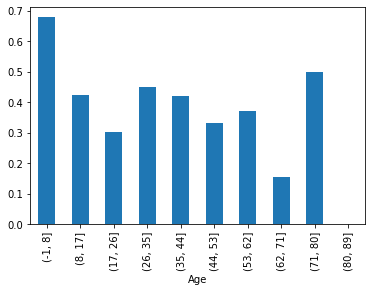

In [103]:
age_range = pd.cut(train["Age"], np.arange(-1, 90, 9))
age_grps = train.groupby(age_range)
print("lenght of each group: ")
for grp, pdf in age_grps:
    print(len(pdf['Age'].tolist()), end=', ')

age_grps = age_grps.mean()
age_grps['Survived'].plot.bar()    

#### Afer several times testing differents thresholds, finaly seperate datas into 9 groups
#### So as u see in the above plot, I decided to seperate the groups sth like this: 
##### 1:  [0-9]
##### 2: [9-18] + [27-36] + [54-63]
##### 3: [18-27] + [36-45] + [45-54] + [63-72] + [72-81] 

In [104]:
ranges = {range(0, 9): 1, range(9, 18): 2, range(27, 36): 2, range(54, 63):2, range(18, 27): 3,
          range(36, 45): 3, range(45, 54): 3, range(63, 72): 3, range(72, 81): 3}

train, test = mapper(train, test, 'Age', ranges)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0


#### Now Im wanna make a new feature using "SibSp" and "Parch"

In [105]:
train['Family'] = np.add(train['SibSp'], train['Parch'])
test['Family'] = np.add(test['SibSp'], test['Parch'])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2,0,0,211536,13.0000,NaN,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,3,0,0,112053,30.0000,B42,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,3,1,2,W./C. 6607,23.4500,NaN,0,3
889,890,1,1,"Behr, Mr. Karl Howell",0,3,0,0,111369,30.0000,C148,1,0


In [106]:
gsib = train.groupby(by=['Family'])
gsib.first()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Family,,,,,,,,,,,,
0,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,E46,0
1,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,7.2500,C85,0
2,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2,0,2,347742,11.1333,G6,0
3,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",1,1,1,2,SC/Paris 2123,41.5792,F4,1
4,8,0,3,"Palsson, Master. Gosta Leonard",0,1,3,1,349909,21.0750,B57 B59 B63 B66,0
5,17,0,3,"Rice, Master. Eugene",0,1,4,1,382652,29.1250,C23 C25 C27,2
6,14,0,3,"Andersson, Mr. Anders Johan",0,3,1,5,347082,31.2750,None,0
7,60,0,3,"Goodwin, Master. William Frederick",0,2,5,2,CA 2144,46.9000,None,0
10,160,0,3,"Sage, Master. Thomas Henry",0,3,8,2,CA. 2343,69.5500,None,0


In [107]:
for grp, pdf in gsib:
    count = 0
    for ele in pdf['Survived'].tolist():
        if ele == 1:
            count +=1
            
    print("Family : ", grp,
          "     count: ", len(pdf), "    Survived: ", count )                

Family :  0      count:  537     Survived:  163
Family :  1      count:  161     Survived:  89
Family :  2      count:  102     Survived:  59
Family :  3      count:  29     Survived:  21
Family :  4      count:  15     Survived:  3
Family :  5      count:  22     Survived:  3
Family :  6      count:  12     Survived:  4
Family :  7      count:  6     Survived:  0
Family :  10      count:  7     Survived:  0


lenght of each group: 
537, 161, 102, 29, 15, 22, 12, 6, 0, 0, 

<AxesSubplot:xlabel='Family'>

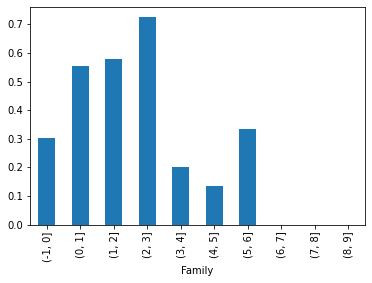

In [108]:
# It should be start from -1 in order to including firts group
family_range = pd.cut(train["Family"], np.arange(-1, 10, 1))
family_grps = train.groupby(family_range)
print("lenght of each group: ")
for grp, pdf in family_grps:
    print(len(pdf['Family'].tolist()), end=', ')

family_grps = family_grps.mean()
family_grps['Survived'].plot.bar() 

#### So as u see in the above plot, the segmentation for family range is sth like this:
##### [1] + [2] + [3]
##### [0] + [4] + [5] + [6] + [7] + [10]

In [109]:
ranges = {0: 1, 1: 2, 2: 2, 3: 2, 4: 1, 5: 1, 6: 1, 7: 1, 10: 1}

train, test = mapper(train, test, 'Family', ranges)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,7.2500,NaN,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1


#### Ooof :) ..
#### Ok now try to handle "Cabin" missing datas using the "Pclass" and the most frequency of cabins in the each passengerClass

In [110]:
group_class = train.groupby(by=['Pclass', 'Survived'])
group_class.first()

PassengerId  \
Pclass Survived                
1      0                   7   
       1                   2   
2      0                  21   
       1                  10   
3      0                   1   
       1                   3   

                                                              Name  Sex  Age  \
Pclass Survived                                                                
1      0                                   McCarthy, Mr. Timothy J    0    2   
       1         Cumings, Mrs. John Bradley (Florence Briggs Th...    1    3   
2      0                                      Fynney, Mr. Joseph J    0    2   
       1                       Nasser, Mrs. Nicholas (Adele Achem)    1    2   
3      0                                   Braund, Mr. Owen Harris    0    3   
       1                                    Heikkinen, Miss. Laina    1    3   

                 SibSp  Parch            Ticket     Fare  Cabin  Embarked  \
Pclass Survived                                                             
1      0             0      0             17463  51.8625    E46         0   
       1             1      0          PC 17599  71.2833    C85         1   
2      0             0      0            239865  26.0000     F2         0   
       1             1      0            237736  30.0708    D56         1   
3      0             1      0         A/5 21171   7.2500  F G73         0   
       1             0      0  STON/O2. 3101282   7.9250     G6         0   

                 Family  
Pclass Survived          
1      0              1  
       1              2  
2      0              1  
       1              2  
3      0              2  
       1              1

In [111]:
train_cabins_most_freq = []
for grp, pdf in group_class:
    cabins_list = pdf[pdf['Cabin'].notnull()]['Cabin'].tolist()
    most_freq = max([(cabins_list.count(ele),ele) for ele in set(cabins_list)])[1]
    train_cabins_most_freq.append(most_freq[0])
    print("Pclass: ", grp[0], "    Survived: ", grp[1], "    assigned: ", most_freq[0])
    nan_arr = pdf[pdf['Cabin'].isnull()]['PassengerId'].tolist()
    for nan in nan_arr:
        train.loc[train['PassengerId'] == nan, 'Cabin'] = most_freq[0]
        

Pclass:  1     Survived:  0     assigned:  D
Pclass:  1     Survived:  1     assigned:  B
Pclass:  2     Survived:  0     assigned:  F
Pclass:  2     Survived:  1     assigned:  F
Pclass:  3     Survived:  0     assigned:  G
Pclass:  3     Survived:  1     assigned:  G


#### As you see I took these Cabins for each of that 6 groups

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Family       891 non-null    int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 90.6+ KB


#### Repeat it for test dataset

In [113]:
group_class_test = test.groupby(by=['Pclass'])
group_class_test.first()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
Pclass,,,,,,,,,,,
1,903,"Jones, Mr. Charles Cresson",0,3,0,0,694,26.0000,B45,0,1
2,894,"Myles, Mr. Thomas Francis",0,2,0,0,240276,9.6875,F,2,1
3,892,"Kelly, Mr. James",0,0,0,0,330911,7.8292,F G63,2,1


In [114]:
counter = 0   # for getting the index for missed data
for grp, pdf in group_class_test:
    cabins_list = pdf[pdf['Cabin'].notnull()]['Cabin'].tolist()
    if not cabins_list:
        most_freq = train_cabins_most_freq[counter]
    else:
        most_freq = max([(cabins_list.count(ele),ele) for ele in set(cabins_list)])[1]
        
    print("Pclass: ", grp, "    assigned: ", most_freq[0])
    nan_arr = pdf[pdf['Cabin'].isnull()]['PassengerId'].tolist()
    for nan in nan_arr:
        test.loc[test['PassengerId'] == nan, 'Cabin'] = most_freq[0]
    counter += 1

Pclass:  1     assigned:  B
Pclass:  2     assigned:  F
Pclass:  3     assigned:  G


In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    int64  
 11  Family       418 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 39.3+ KB


#### Now convert the "Cabin" values to integers for our ML process

In [116]:
ranges = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

train, test = mapper(train, test, 'Cabin', ranges)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,7.2500,7,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,3,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,7,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,3,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,7,0,1


#### Plot the cabins for make a decision on segmentation lentgh

lenght of each group: 
407, 483, 

<AxesSubplot:xlabel='Cabin'>

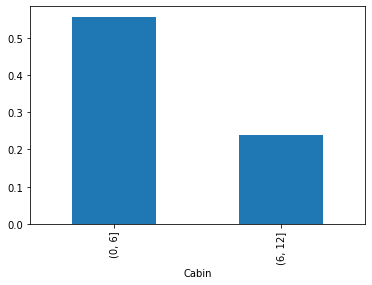

In [117]:
cabin_range = pd.cut(train["Cabin"], np.arange(0, 15, 6))
cabin_grps = train.groupby(cabin_range)
print("lenght of each group: ")
for grp, pdf in cabin_grps:
    print(len(pdf['Cabin'].tolist()), end=', ')

cabin_grps = cabin_grps.mean()
cabin_grps['Survived'].plot.bar() 

#### As u see in above plot, I decided to separate the "Cabin" attr into 2 groups
##### 1: [1] + [2] + [5] + [6] + [3] + [4]
##### 2:  [7]

In [118]:
ranges = {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 2}

train, test = mapper(train, test, 'Cabin', ranges, mode=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,7.2500,2,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,1,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,2,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,1,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,2,0,1


#### As a break, I implemented a getEntropy function to see how good the entropy of our features are

In [119]:
eps = np.finfo(float).eps
def get_entropy(dataset, attr):
    entropy = 0
    
    labels   = dataset['Survived'].unique()        # 0: dead, 1: alived
    features = dataset[attr].unique()              # Each feature for an attr. e.g. Sex attr has (Female, Male) features. 
    
    for feature in features:
        feature_entropy = 0
        
        for label in labels:
            cnt_of_each_grp = len(dataset[attr][dataset[attr]==feature][dataset['Survived']==label])
            cnt_of_all = len(dataset[attr][dataset[attr]==feature])
            fraction = np.divide(cnt_of_each_grp, np.add(cnt_of_all, eps))
            if fraction == 0:
                feature_entropy += 1   
            else: 
                feature_entropy += np.multiply(-fraction, np.log2(fraction))               
        
        fraction_of_features = np.divide(cnt_of_all, np.add(len(dataset), eps))
        entropy += np.multiply(fraction_of_features, feature_entropy)
        return entropy

#### And let's see the entropy of features

In [120]:
entropy = {k:round(get_entropy(train, k), 2) for k in train.columns}
print("Entropy of each atrr: ")
entropy

Entropy of each atrr: 


{'PassengerId': 0.0,
 'Survived': 0.62,
 'Pclass': 0.44,
 'Name': 0.0,
 'Sex': 0.45,
 'Age': 0.54,
 'SibSp': 0.23,
 'Parch': 0.71,
 'Ticket': 0.0,
 'Fare': 0.01,
 'Cabin': 0.43,
 'Embarked': 0.67,
 'Family': 0.32}

#### Which some of them have not possible entropy like "PassengerId", "Name" and so on ...
#### Because they are almost unique features and seperated into many many nodes and it's not good 

#### Now it's time to start our ship to explore how is the situation :)

## Decision Tree

In [121]:
X_train = train.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Fare'], axis=1)
Y_train = train["Survived"]
X_test  = test.drop(['PassengerId', 'Name', 'Ticket', 'Fare'], axis=1)

In [122]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int64
 2   Age       891 non-null    int64
 3   SibSp     891 non-null    int64
 4   Parch     891 non-null    int64
 5   Cabin     891 non-null    int64
 6   Embarked  891 non-null    int64
 7   Family    891 non-null    int64
dtypes: int64(8)
memory usage: 55.8 KB


#### I decided to remove that 2 rows which are null in Embarked 

In [123]:
X_train = X_train.dropna()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int64
 2   Age       891 non-null    int64
 3   SibSp     891 non-null    int64
 4   Parch     891 non-null    int64
 5   Cabin     891 non-null    int64
 6   Embarked  891 non-null    int64
 7   Family    891 non-null    int64
dtypes: int64(8)
memory usage: 62.6 KB


In [124]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    418 non-null    int64
 1   Sex       418 non-null    int64
 2   Age       418 non-null    int64
 3   SibSp     418 non-null    int64
 4   Parch     418 non-null    int64
 5   Cabin     418 non-null    int64
 6   Embarked  418 non-null    int64
 7   Family    418 non-null    int64
dtypes: int64(8)
memory usage: 26.2 KB


#### Make a DecisionTreeClassifier using entropy criterion which means using ID3

In [126]:
tree = DecisionTreeClassifier(criterion='entropy',splitter='best', min_samples_split=6)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=6)

In [127]:
Y_prediction = tree.predict(X_test)
ascending_tree = round(np.multiply(tree.score(X_train, Y_train), 100), 2)
print("Train accuracy of Decision tree:   ", ascending_tree)

Train accuracy of Decision tree:    86.2


#### Unfortunately the Survived attr is not in the test dataset to see the accuracy

#### The accuracy of DecisionTree was 73 at the first, without any preprocessing on features and handling missing datas
#### but now it increased because of that preprocesses

# Conclusion:
### Let's list what I did as an again explaination:
### 1: Handled missing values of "Age" by 3 times grouping by "Sex", "Pclass" and "Survived" and finaly replace the missings with median of each these 12 groups

### 2: Grouped ages into groups of 9 and then according to the plot, linked groups to eachother
### 3: Defined the new feature named "Family" by adding "SibSp" to "Parch"
### 4: Grouped families into groups of 2 and then according to the plot, linked groups to eachother
### 5: Handled missing values of "Cabin" by 2 times grouping by "Pclass" and "Survived" and after that replaced that missing values with the most frequencies cabin in each of that 6 groups
### 6: And then grouped cabins into groups of 6 and according to the plot, linked groups to eachother
### 7: As an extra part, I defined a function which calculate the entropy, used that to get a general sense of importance features
### 8: Finaly our preprocessing on dataset completed and tried to make DecisionTreeClassifier and Perceptron and PerceptronTree which is combination of them
#### 
## Accuracy:
### DecisionTree (train): 86.2
###  DecisionTree (test): NON - The  Survived attr is not in test dataset to evaluate the model
### Finaly finishe :)))